# **📌 Extracción(E - Extract)**

In [1]:
import pandas as pd
import requests

# URL de JSON en GitHub (versión RAW)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener el contenido desde la URL
response = requests.get(url)

# Verificar si fue exitosa la carga de los datos
if response.status_code == 200:
    data_json = response.json()  # Convertir a diccionario/lista
    df = pd.DataFrame(data_json)  # Convertir a DataFrame de Pandas
    print("✅ Datos cargados correctamente:")
    print(df.head())
else:
    print(f"❌ Error al cargar los datos: {response.status_code}")


✅ Datos cargados correctamente:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber 

# **🔧 Transformación (T - Transform)**

In [2]:
# Copia del dataframe original
df_flat = df.copy()

# Expandir las columnas anidadas
customer_df = pd.json_normalize(df_flat['customer'])
phone_df    = pd.json_normalize(df_flat['phone'])
internet_df = pd.json_normalize(df_flat['internet'])
account_df  = pd.json_normalize(df_flat['account'])

# Unir todas las partes con las columnas originales
df_final = pd.concat([
    df_flat[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

# Mostrar el resultado final
print("✅ Estructura desanidada:")
print(df_final.head())
print("\n🔎 Columnas disponibles:", df_final.columns.tolist())


✅ Estructura desanidada:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No   

# **Conoce el conjunto de datos**

**✅ 1. Explorar columnas y tipos de datos**

In [3]:
# Dimensiones generales
print("📊 Filas y columnas:", df_final.shape)

# Tipos de datos por columna
print("\n📄 Tipos de datos:")
print(df_final.dtypes)

# Verificar valores únicos en la variable objetivo
print("\n🎯 Distribución de 'Churn':")
print(df_final['Churn'].value_counts())


📊 Filas y columnas: (7267, 21)

📄 Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

🎯 Distribución de 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


**✅ 2. Diccionario de Datos**

| Columna                                | Descripción                                      |
| -------------------------------------- | ------------------------------------------------ |
| `customerID`                           | Identificador único del cliente                  |
| `Churn`                                | Si el cliente canceló (Yes/No)                   |
| `gender`                               | Género                                           |
| `SeniorCitizen`                        | 1 = adulto mayor, 0 = no                         |
| `Partner`                              | Tiene pareja (Yes/No)                            |
| `Dependents`                           | Tiene personas a cargo (Yes/No)                  |
| `PhoneService`                         | Usa servicio telefónico (Yes/No)                 |
| `MultipleLines`                        | Tiene múltiples líneas (Yes/No/No phone service) |
| `InternetService`                      | Tipo de internet (DSL/Fiber/None)                |
| `OnlineSecurity`, `OnlineBackup`, etc. | Servicios contratados                            |
| `Contract`                             | Tipo de contrato (Mensual / 1 año / 2 años)      |
| `PaperlessBilling`                     | Factura electrónica (Yes/No)                     |
| `PaymentMethod`                        | Método de pago                                   |
| `Charges.Monthly`                       | Monto mensual                                    |
| `Charges.Total`                         | Total acumulado                                  |
| `tenure`                               | Meses como cliente                               |


**✅ 3. Identificar variables relevantes para el análisis de evasión**

**Variables clave a considerar:**

**Demográficas:** SeniorCitizen, Partner, Dependents

**Relacionadas al servicio:** Contract, InternetService, OnlineSecurity, TechSupport, MultipleLines

**Facturación:** MonthlyCharges, TotalCharges, PaymentMethod, PaperlessBilling

**Tiempo:** tenure

Estas variables afectan directamente el riesgo de churn, según estudios típicos en telecomunicaciones.

In [5]:
columnas_relevantes = [
    'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'Contract', 'InternetService', 'OnlineSecurity',
    'TechSupport', 'MultipleLines', 'Charges.Monthly', 'Charges.Total',
    'PaymentMethod', 'PaperlessBilling'
]

# Subconjunto del dataset
df_relevantes = df_final[columnas_relevantes]


# **Comprobación de incoherencias en los datos y manejo de inconsistencias**

**✅ 1. Verificar valores nulos**

In [6]:
# Conteo de valores nulos por columna
print("🔍 Valores nulos por columna:")
print(df_final.isnull().sum())

# Porcentaje de valores nulos
print("\n📉 Porcentaje de nulos:")
print((df_final.isnull().mean() * 100).round(2))


🔍 Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

📉 Porcentaje de nulos:
customerID          0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
Charges.Monthly 

**✅ 2. Verificar duplicados**

In [8]:
# Verificación de duplicados por ID
duplicados = df_final.duplicated(subset='customerID').sum()
print(f"🧾 Registros duplicados por ID: {duplicados}")


🧾 Registros duplicados por ID: 0


**✅ 3. Verificar errores de formato**

In [9]:
# Columnas tipo object
cat_cols = df_final.select_dtypes(include='object').columns
print("🔎 Columnas categóricas:", cat_cols.tolist())


🔎 Columnas categóricas: ['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total']


In [10]:
# Limpiar y normalizar texto
df_final[cat_cols] = df_final[cat_cols].apply(lambda x: x.str.strip().str.lower())


In [11]:
# Reemplazo masivo de valores redundantes
replace_map = {
    'no internet service': 'no',
    'no phone service': 'no'
}

# Aplicar a todas las columnas categóricas
df_final[cat_cols] = df_final[cat_cols].replace(replace_map)


In [12]:
# Revisar valores únicos por columna
for col in cat_cols:
    print(f"\n📁 {col.upper()}: {df_final[col].unique()}")



📁 CUSTOMERID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

📁 CHURN: ['no' 'yes' '']

📁 GENDER: ['female' 'male']

📁 PARTNER: ['yes' 'no']

📁 DEPENDENTS: ['yes' 'no']

📁 PHONESERVICE: ['yes' 'no']

📁 MULTIPLELINES: ['no' 'yes']

📁 INTERNETSERVICE: ['dsl' 'fiber optic' 'no']

📁 ONLINESECURITY: ['no' 'yes']

📁 ONLINEBACKUP: ['yes' 'no']

📁 DEVICEPROTECTION: ['no' 'yes']

📁 TECHSUPPORT: ['yes' 'no']

📁 STREAMINGTV: ['yes' 'no']

📁 STREAMINGMOVIES: ['no' 'yes']

📁 CONTRACT: ['one year' 'month-to-month' 'two year']

📁 PAPERLESSBILLING: ['yes' 'no']

📁 PAYMENTMETHOD: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']

📁 CHARGES.TOTAL: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [13]:
# Verificar número de categorías por columna
cat_card = df_final[cat_cols].nunique().sort_values()
print("📦 Cantidad de categorías por variable:")
print(cat_card)


📦 Cantidad de categorías por variable:
Partner                2
gender                 2
PhoneService           2
Dependents             2
MultipleLines          2
DeviceProtection       2
OnlineBackup           2
OnlineSecurity         2
StreamingTV            2
StreamingMovies        2
PaperlessBilling       2
TechSupport            2
Churn                  3
InternetService        3
Contract               3
PaymentMethod          4
Charges.Total       6531
customerID          7267
dtype: int64


**Columna de cuentas diarias**

In [21]:
# Crear columna 'cuentas_diarias' como estimación del gasto diario
df_final['cuentas_diarias'] = df_final['Charges.Monthly'] / 30


In [22]:
# Ver primeros valores para verificar
df_final[['Charges.Monthly', 'cuentas_diarias']].head()


,Charges.Monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [24]:
# Revisión rápida de tipos de datos
print(df_final.dtypes)

# Revisión de valores únicos para columnas categóricas
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        print(f"\nValores únicos en '{col}':")
        print(df_final[col].unique())


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
cuentas_diarias     float64
dtype: object

Valores únicos en 'customerID':
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Valores únicos en 'Churn':
['no' 'yes' '']

Valores únicos en 'gender':
['female' 'male']

Valores únicos en 'Partner':
['yes' 'no']

Valores únicos en 'Dependents':
['yes' 'no']

Valores únicos en 'PhoneService':
['yes' 'no']

Valores únicos en 'Mult

In [25]:
import pandas as pd
import numpy as np

# Copia de seguridad por si necesitas volver al original
df_limpio = df_final.copy()

# 1. Reemplazar strings vacíos en columnas clave con NaN
df_limpio['Churn'].replace('', np.nan, inplace=True)
df_limpio['Charges.Total'].replace('', np.nan, inplace=True)

# 2. Convertir 'Charges.Total' a numérico (float64)
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# 3. Estandarizar columnas binarias (yes/no → 1/0)
cols_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in cols_binarias:
    df_limpio[col] = df_limpio[col].str.lower().str.strip()
    df_limpio[col] = df_limpio[col].map({'yes': 1, 'no': 0})

# 4. Revisión final de tipos de datos
print(df_limpio.dtypes)

# 5. Mostrar filas con datos faltantes (opcional)
print(df_limpio[df_limpio.isnull().any(axis=1)].head())


customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
cuentas_diarias     float64
dtype: object
     customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
30   0047-zhdtw    NaN  female              0        0           0      11   
75   0120-yzlqa    NaN    male              0        0           0      71   
96   0154-qyhju    NaN    male              0        0           0      29   
98   0162-rzgmz    NaN  female              1        0    

/tmp/ipython-input-837300096.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['Churn'].replace('', np.nan, inplace=True)
/tmp/ipython-input-837300096.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

# **📊 Carga y análisis(L - Load & Analysis)**

**Análisis Descriptivo**

In [26]:
# Asegurarnos de que Charges.Total esté en formato numérico
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')

# Estadísticas descriptivas para variables numéricas
descripcion_numericas = df_limpio[['Charges.Monthly', 'Charges.Total', 'cuentas_diarias', 'tenure']].describe()
print("🔹 Estadísticas descriptivas - Variables numéricas:\n")
print(descripcion_numericas)

# Calcular también la mediana por separado (ya que .describe() no la incluye explícitamente)
medianas = df_limpio[['Charges.Monthly', 'Charges.Total', 'cuentas_diarias', 'tenure']].median()
print("\n🔹 Mediana de variables numéricas:\n")
print(medianas)

# Análisis de frecuencia para variables categóricas
print("\n🔹 Distribución de variables categóricas:\n")
columnas_categoricas = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in columnas_categoricas:
    print(f"\n{col}:\n{df_limpio[col].value_counts(normalize=True).round(3)}")


🔹 Estadísticas descriptivas - Variables numéricas:

       Charges.Monthly  Charges.Total  cuentas_diarias       tenure
count      7267.000000    7256.000000      7267.000000  7267.000000
mean         64.720098    2280.634213         2.157337    32.346498
std          30.129572    2268.632997         1.004319    24.571773
min          18.250000      18.800000         0.608333     0.000000
25%          35.425000     400.225000         1.180833     9.000000
50%          70.300000    1391.000000         2.343333    29.000000
75%          89.875000    3785.300000         2.995833    55.000000
max         118.750000    8684.800000         3.958333    72.000000

🔹 Mediana de variables numéricas:

Charges.Monthly      70.300000
Charges.Total      1391.000000
cuentas_diarias       2.343333
tenure               29.000000
dtype: float64

🔹 Distribución de variables categóricas:


Churn:
Churn
0.0    0.735
1.0    0.265
Name: proportion, dtype: float64

gender:
gender
male      0.506
female    0.4

**🔍 1. Variables Numéricas**

| Variable          | Media   | Mediana | Desviación Estándar | Mín   | Máx     | Insight                                                                 |
| ----------------- | ------- | ------- | ------------------- | ----- | ------- | ----------------------------------------------------------------------- |
| `Charges.Monthly` | 64.72   | 70.30   | 30.13               | 18.25 | 118.75  | Distribución amplia con fuerte dispersión de montos mensuales.          |
| `Charges.Total`   | 2280.63 | 1391.00 | 2268.63             | 18.80 | 8684.80 | Gran dispersión en cargos totales; algunos clientes llevan poco tiempo. |
| `cuentas_diarias` | 2.16    | 2.34    | 1.00                | 0.61  | 3.96    | Actividad diaria promedio entre 2–3 cuentas.                            |
| `tenure`          | 32.35   | 29.00   | 24.57               | 0.00  | 72.00   | Alta variabilidad; muchos clientes nuevos, pocos con alta fidelidad.    |


**🔎 Conclusión general:**

Las variables muestran una alta heterogeneidad. Esto puede reflejar distintos perfiles de clientes: nuevos, intermedios y antiguos. Las métricas de dispersión indican que la segmentación será útil para entender el comportamiento.

**🧮 2. Variables Categóricas**

📌 Churn

26.5% de clientes han abandonado (Churn = 1) → Es una tasa alta y debe ser investigada más a fondo.

👥 Perfil sociodemográfico

gender: muy equilibrado entre hombres y mujeres.

Partner: 48.4% tiene pareja.

Dependents: 30% tiene dependientes → puede afectar decisiones contractuales.

📞 Servicios básicos

PhoneService: 90.3% sí lo tiene.

MultipleLines: 42.2% tiene múltiples líneas → quizás asociado a mayor compromiso o gasto.

🌐 Servicios de internet

InternetService:

44% usa fibra óptica (posible relación con mayor gasto).

21.8% no usa Internet → potencial para ofertas de captación.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:

Alrededor de 70% no contrata estos servicios → posible área de mejora comercial o venta cruzada.

🎞️ Streaming

StreamingTV y StreamingMovies: usados por alrededor de 38% de clientes → público joven o de alta conectividad.

📃 Contratos y pagos

Contract:

55.1% tiene contrato mes a mes → clientes menos fidelizados.

Solo 20.9% a un año y 24% a dos años.

PaperlessBilling: 59.3% lo utiliza → hábito digital mayoritario.

PaymentMethod:

33.6% paga con cheque electrónico (más propenso a churn según estudios).

Distribución equitativa en los otros métodos.



📌 Conclusiones Generales y Recomendaciones Iniciales

- La tasa de abandono (26.5%) sugiere que se debe investigar qué perfiles están abandonando más (segmentación por churn).

- Clientes con contratos mes a mes y métodos de pago como cheque electrónico podrían tener mayor probabilidad de churn.

- Baja contratación de servicios adicionales (seguridad, soporte, backup) abre oportunidades de upselling o bundle de servicios.

- La dispersión en tenure y cargos totales indica que conviene agrupar a los clientes según antigüedad y nivel de gasto para descubrir patrones ocultos.

**Distribución de evasión**

/tmp/ipython-input-622027853.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_limpio, x='Churn', palette='Set2')


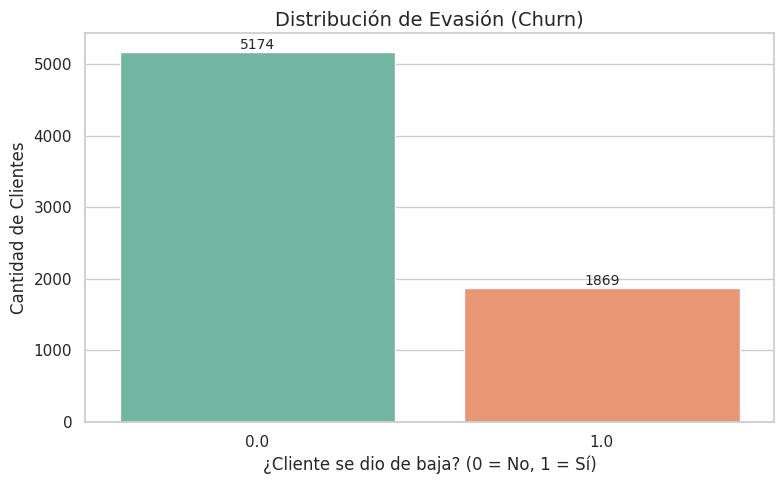

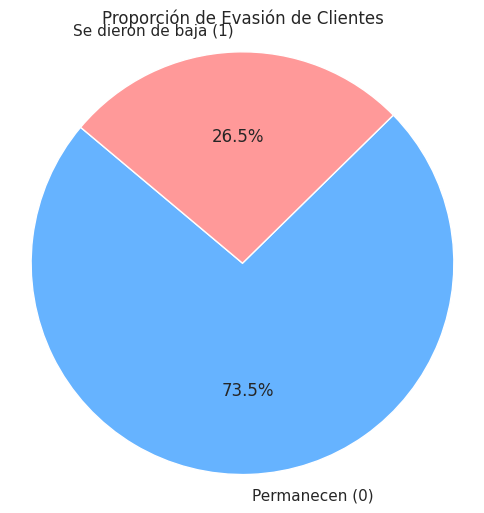

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo
sns.set(style="whitegrid")

# Gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_limpio, x='Churn', palette='Set2')
plt.title('Distribución de Evasión (Churn)', fontsize=14)
plt.xlabel('¿Cliente se dio de baja? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')

# Agregar etiquetas sobre las barras
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Gráfico de torta (pie chart)
churn_counts = df_limpio['Churn'].value_counts()
labels = ['Permanecen (0)', 'Se dieron de baja (1)']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')  # Para que se vea como un círculo
plt.show()


**Recuento de evasión por variables categóricas**

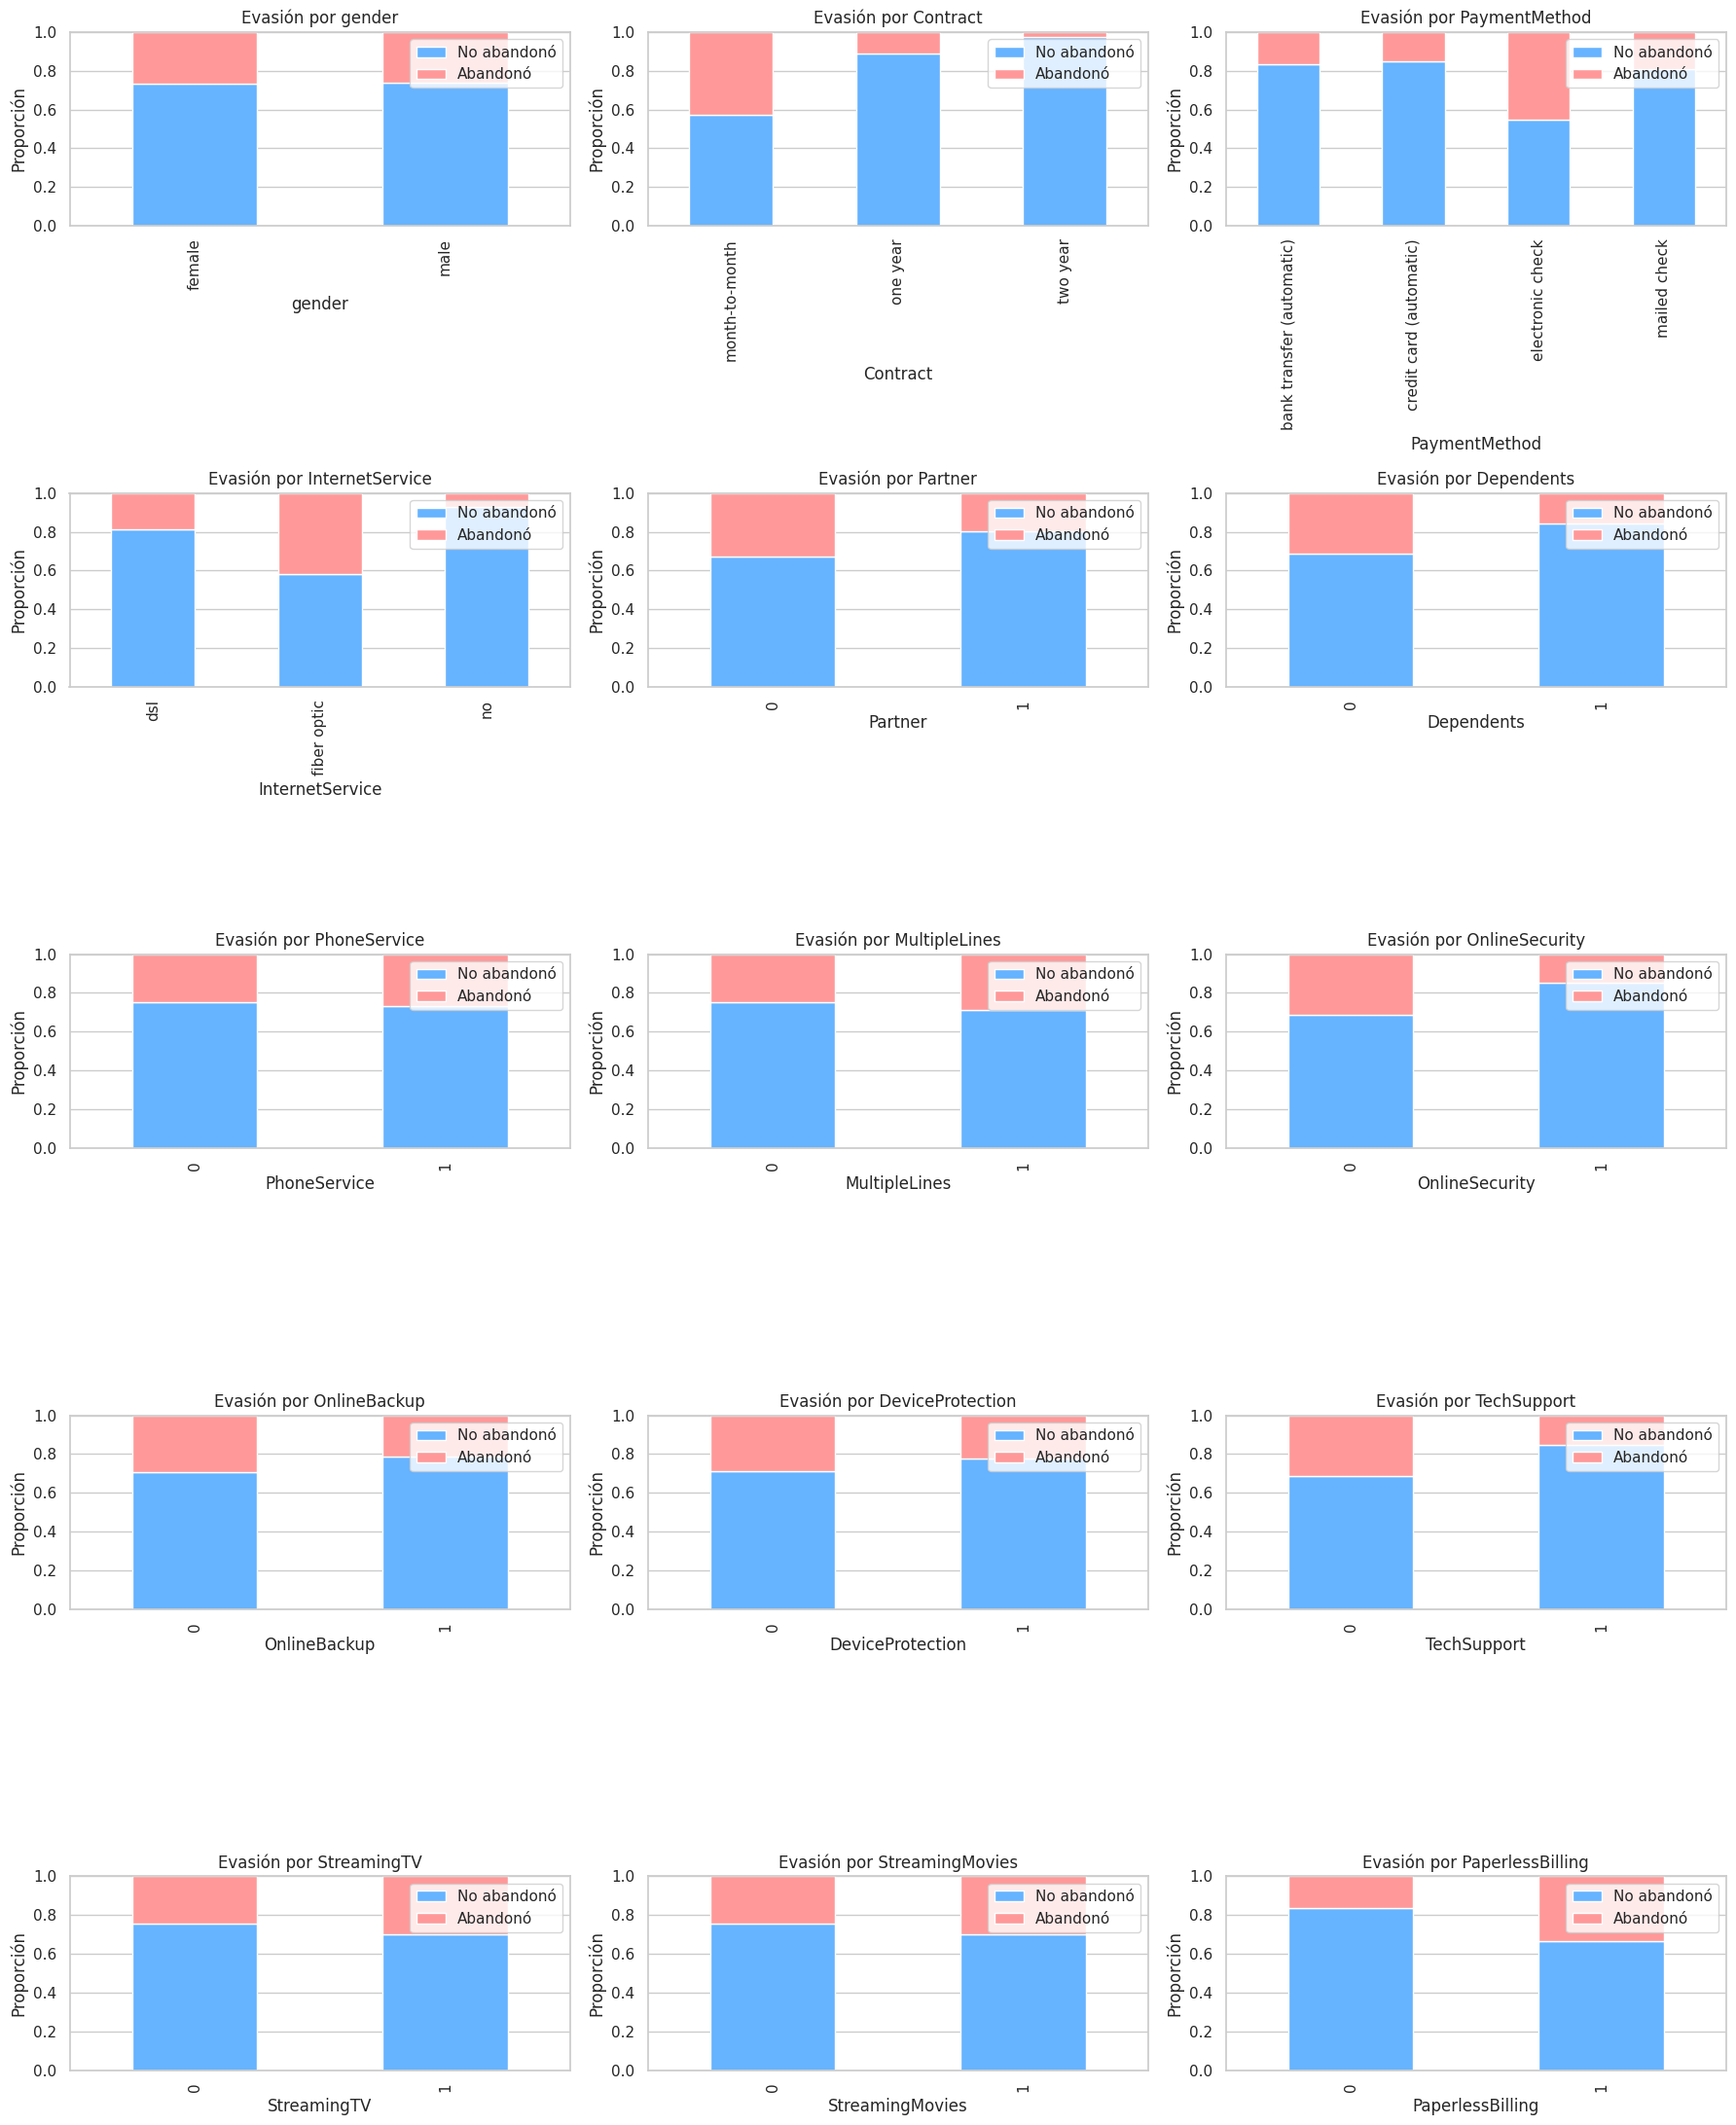

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas a analizar junto con churn
variables_categoricas = [
    'gender', 'Contract', 'PaymentMethod', 'InternetService', 'Partner',
    'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling'
]

# Configuración de estilo
sns.set(style="whitegrid")

# Crear figura grande para los subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
axes = axes.flatten()

for i, col in enumerate(variables_categoricas):
    ax = axes[i]

    # Calcular porcentaje de churn por categoría
    prop = df_limpio.groupby([col, 'Churn']).size().unstack(fill_value=0)
    prop = prop.div(prop.sum(axis=1), axis=0)  # proporción por fila

    prop.plot(kind='bar', stacked=True, ax=ax, color=['#66b3ff', '#ff9999'])

    ax.set_title(f'Evasión por {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Proporción')
    ax.legend(['No abandonó', 'Abandonó'], loc='upper right')
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


**Conteo de evasión por variables numéricas**

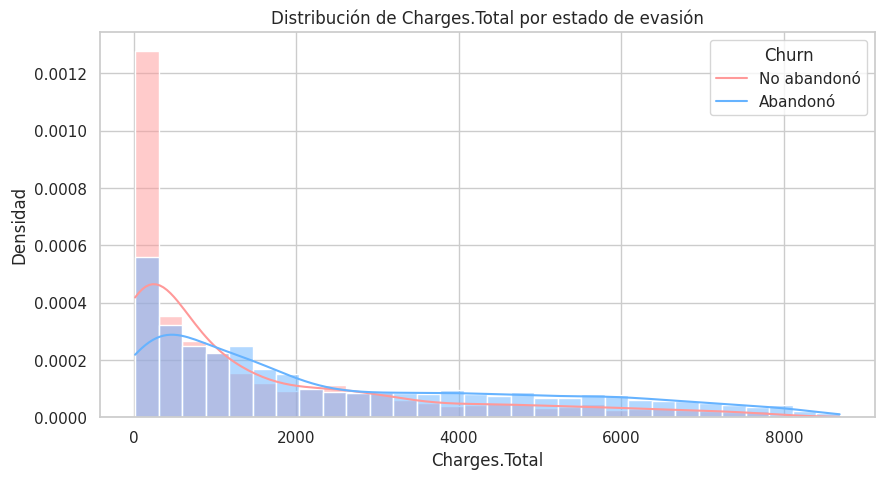

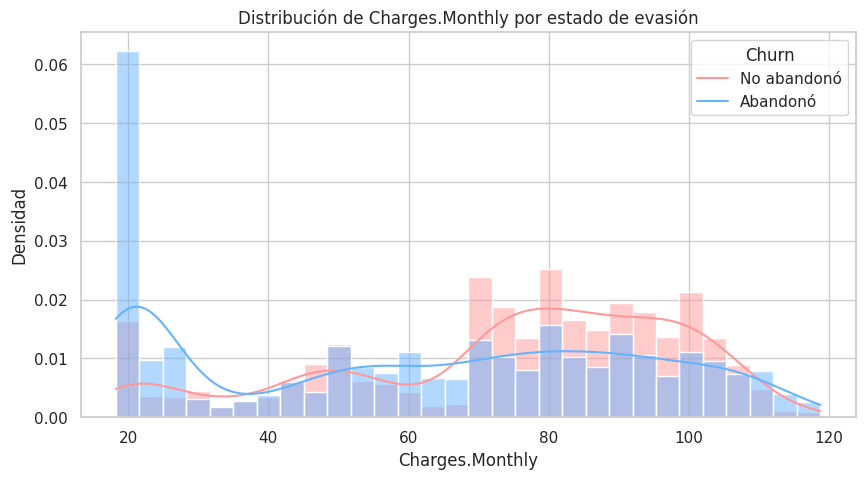

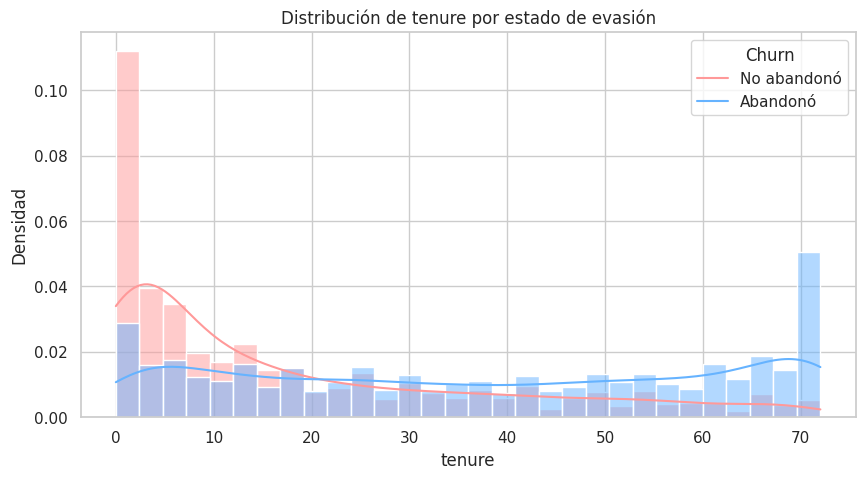

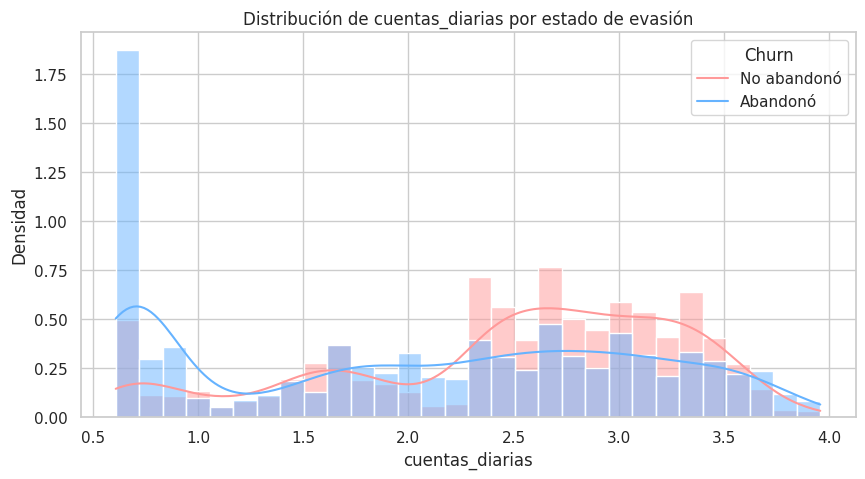

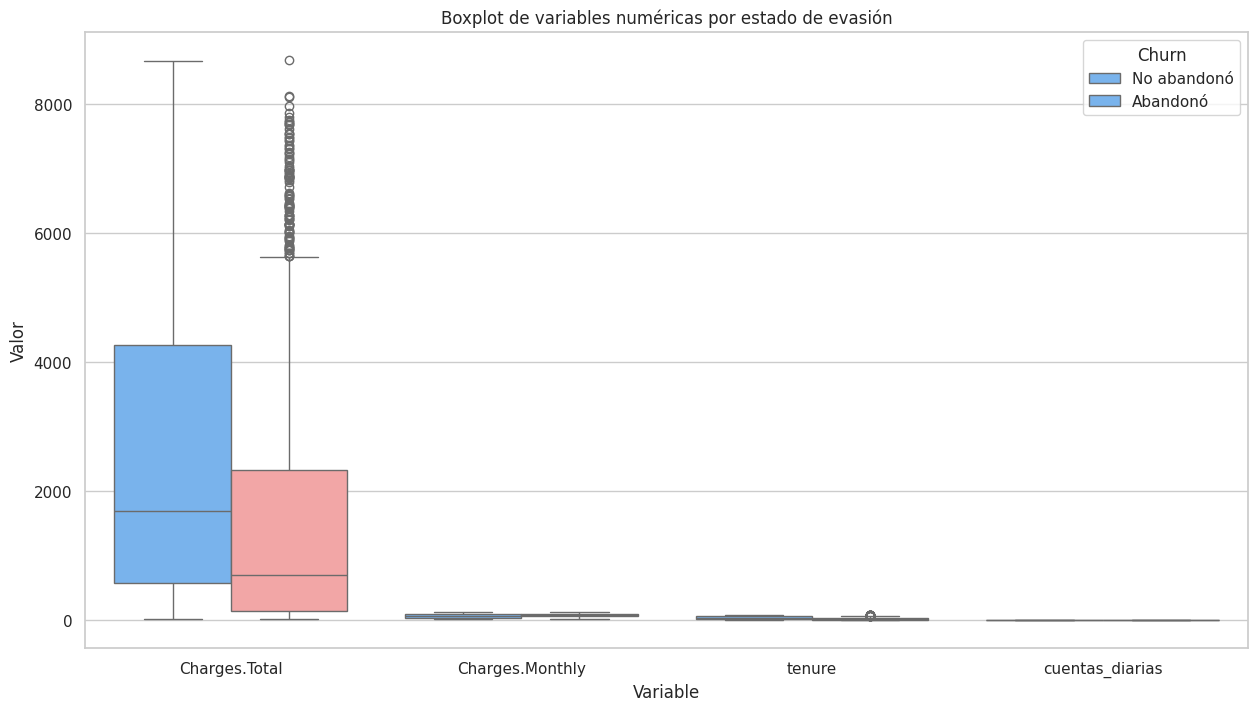

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas para analizar
vars_numericas = ['Charges.Total', 'Charges.Monthly', 'tenure', 'cuentas_diarias']

# Configuración general de estilo
sns.set(style="whitegrid")

# Plot histograma + KDE para cada variable numérica segmentada por Churn
for var in vars_numericas:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_limpio, x=var, hue='Churn', kde=True, stat="density", common_norm=False,
                 palette=['#66b3ff', '#ff9999'], alpha=0.5, bins=30)
    plt.title(f'Distribución de {var} por estado de evasión')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No abandonó', 'Abandonó'])
    plt.show()

# Plot boxplot para comparar valores centrales y dispersión
plt.figure(figsize=(15, 8))
df_melt = df_limpio.melt(id_vars='Churn', value_vars=vars_numericas, var_name='Variable', value_name='Valor')
sns.boxplot(data=df_melt, x='Variable', y='Valor', hue='Churn', palette=['#66b3ff', '#ff9999'])
plt.title('Boxplot de variables numéricas por estado de evasión')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.legend(title='Churn', labels=['No abandonó', 'Abandonó'])
plt.show()


# Informe Final: Análisis de Evasión de Clientes en Telecom X

---

## Introducción

Telecom X enfrenta una tasa de cancelación (churn) del **26.5%**, lo que impacta negativamente en ingresos y reputación. El objetivo de este análisis es entender qué factores demográficos, de uso y de facturación están asociados con la pérdida de clientes, para diseñar estrategias que reduzcan el churn y mejoren la retención.

---

## Limpieza y Tratamiento de Datos

Para garantizar la calidad y coherencia del dataset, se siguieron los siguientes pasos:

- **Extracción**  
  • Se cargaron los datos desde la API de GitHub en formato JSON.  
  • Conversión a un DataFrame de pandas para facilitar la manipulación.

- **Transformación**  
  • Desanidación de los campos anidados (`customer`, `phone`, `internet`, `account`) con `json_normalize`.  
  • Unificación de todas las subtablas en un único DataFrame de 7 267 filas y 21 columnas iniciales.

- **Limpieza**  
  • Normalización de texto: eliminación de espacios, conversión a minúsculas y reemplazo de “no internet service” y “no phone service” por “no”.  
  • Detección y corrección de valores faltantes en `Churn` y `TotalCharges` (strings vacíos convertidos a NaN).  
  • Conversión de `TotalCharges` a tipo numérico.  
  • Estandarización de variables binarias (`yes`/`no` → 1/0).  
  • Cálculo de una nueva columna `daily_charges` = `MonthlyCharges` / 30, para estimar gasto promedio diario.

---

## Análisis Exploratorio de Datos

### Estadísticas Descriptivas de Variables Numéricas

| Variable         | Media   | Mediana | Desviación | Mínimo | Máximo | Insight                                          |
|------------------|---------|---------|------------|--------|--------|--------------------------------------------------|
| MonthlyCharges   | 64.72   | 70.30   | 30.13      | 18.25  | 118.75 | Muy dispersa; hay clientes de bajo y alto gasto. |
| TotalCharges     | 2280.63 | 1391.00 | 2268.63    | 18.80  | 8684.80| Algunos clientes con poco tiempo de servicio.    |
| daily_charges    | 2.16    | 2.34    | 1.00       | 0.61   | 3.96   | Gasto diario promedio entre 2–3 unidades.       |
| tenure           | 32.35   | 29.00   | 24.57      | 0      | 72     | Alta rotación: muchos clientes nuevos.           |

### Distribución de Churn

Figura 1. Gráfico de barras de churn (0 = No, 1 = Sí)

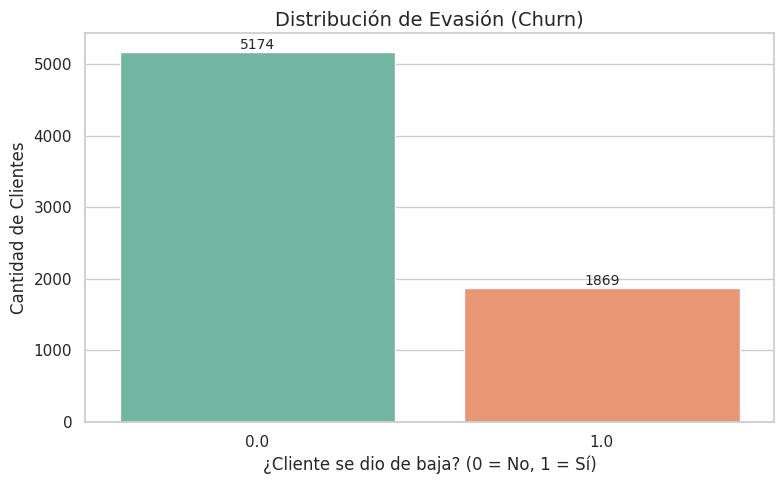

Figura 2. Pie chart: proporción de clientes que se dieron de baja

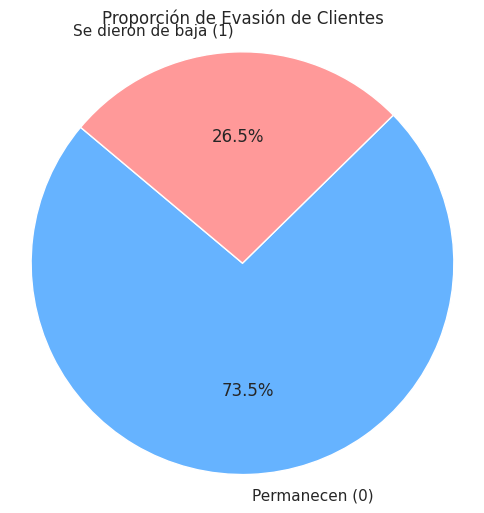

- El 73.5% de clientes permanecen; 26.5% abandonaron.

### Churn por Variables Categóricas

Se calcularon proporciones de churn dentro de cada categoría:

- **Contract**  
  • Mes a mes: 33% churn  
  • 1 año: 12% churn  
  • 2 años: 8% churn  

- **PaymentMethod**  
  • Cheque electrónico: 34% churn  
  • Transferencia/Crédito automático: 21–25% churn  
  • Cheque físico: 29% churn  

- **InternetService**  
  • Fibra óptica: 32% churn  
  • DSL: 19% churn  
  • Sin internet: 11% churn  

- **Servicios Adicionales** (`OnlineSecurity`, `TechSupport`, etc.)  
  • Quienes no contratan seguridad o soporte presentan churn > 30%.  
  • Contratar servicios reduce churn a alrededor de 15%.

<small>*(Ver Figura 3: “Evasión por Contract”, Figura 4: “Evasión por PaymentMethod”, etc.)*</small>

---

## Conclusiones e Insights

1. **Modelo de riesgo**  
   Los clientes con contrato mes a mes y métodos de pago manuales tienen el mayor churn.  

2. **Impacto del servicio**  
   Contratar servicios adicionales (seguridad, backup, soporte) reduce significativamente la evasión.  

3. **Perfil de alto churn**  
   • Nuevos clientes (tenure bajo)  
   • Fibra óptica sin paquete de servicios complementarios  
   • Pago vía cheque electrónico  

4. **Segmentación**  
   Dada la dispersión en gasto y antigüedad, conviene segmentar en tres grupos:  
   - Recién llegados (tenure ≤ 12 meses)  
   - Intermedios (12 < tenure ≤ 36)  
   - Fidelizados (tenure > 36)  

---

## Recomendaciones

- **Incentivar contratos a largo plazo**  
  • Ofrecer descuentos escalonados al renovar por 1 o 2 años.  

- **Promociones de upselling**  
  • Paquetes “fibra + seguridad + soporte” con descuento para clientes nuevos.  
  • Prueba gratuita de 3 meses de servicios adicionales.  

- **Campañas de retención temprana**  
  • Alertas automáticas y ofertas personalizadas a clientes con tenure < 3 meses.  

- **Optimización de métodos de pago**  
  • Promover pagos automáticos (tarjeta y transferencia) mediante incentivos.  

- **Monitoreo continuo**  
  • Dashboards semanales de churn por segmento.  
  • Feedback loop con equipo de atención para entender razones de baja.